# **Tahap 1 : Gabungkan 3 file menjadi 1**

In [1]:
import pandas as pd

# Supaya hasil tidak terpotong
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Baca dan gabungkan file Excel (skip 2 baris header atas)
df1 = pd.read_excel('27 mar-14 apr 2025.xls', engine='xlrd', skiprows=2)
df2 = pd.read_excel('ESIGNAL 28-31 MEI.xls', engine='xlrd', skiprows=2)
df3 = pd.read_excel('esignal tgl11 sd 20 maret.xls', engine='xlrd', skiprows=2)

gabung = pd.concat([df1, df2, df3], ignore_index=True)

print("✅ Data Gabungan (10 Baris Pertama):")
print(gabung.head(10).to_string(index=False))
print("\nJumlah Total Data:", len(gabung))
print("\nNama Kolom:", ', '.join(gabung.columns))

✅ Data Gabungan (10 Baris Pertama):
  NO.    TANGGAL      JAM            KODE DATI NO. POLISI  KODE BILLING  POKOK PKB  OPSEN PKB POKOK  DENDA PKB  BUNGA PKB  OPSEN PKB BUNGA POKOK SWDKLLJ  DENDA SWDKLLJ  PNBP PENGESAHAN     TOTAL
  1.0 27/03/2025 00:12:00         PALEMBANG II  BG6620AEP  3.212503e+15     174600           115250        0.0    13975.0           9225.0         35000        24000.0              0.0  372050.0
  2.0 27/03/2025 02:38:00         LUBUKLINGGAU   BG1464HP  3.212503e+15    1275750           842000        0.0    12775.0           8425.0        143000        35000.0              0.0 2316950.0
  3.0 27/03/2025 07:19:00         PALEMBANG IV  BG2383AFA  3.212503e+15     148500            98025        0.0        0.0              0.0         35000            0.0              0.0  281525.0
  4.0 27/03/2025 07:58:00         PALEMBANG IV  BG6683ADX  3.212503e+15     131400            86725        0.0     1325.0            875.0         35000         8000.0              0.0

# **Tahap 2 : Filter hanya Palembang 1 & Processing Awal**

In [2]:
palembang1 = gabung[gabung['KODE DATI'].str.upper() == 'PALEMBANG I'].copy()
print("\nJumlah Data PALEMBANG I:", len(palembang1))

# Konversi kolom numerik
palembang1['POKOK SWDKLLJ'] = pd.to_numeric(palembang1['POKOK SWDKLLJ'], errors='coerce')

# Format tanggal & waktu
palembang1['TANGGAL'] = pd.to_datetime(palembang1['TANGGAL'], dayfirst=True, errors='coerce')
palembang1['JAM'] = palembang1['JAM'].astype(str)
palembang1['WAKTU'] = pd.to_datetime(palembang1['TANGGAL'].astype(str) + ' ' + palembang1['JAM'], errors='coerce')
palembang1['TANGGAL_ONLY'] = palembang1['WAKTU'].dt.date

# Print hasil akhir
print("\nContoh Data PALEMBANG I:")
print(palembang1[['TANGGAL', 'JAM', 'WAKTU', 'TANGGAL_ONLY']])


Jumlah Data PALEMBANG I: 383

Contoh Data PALEMBANG I:
        TANGGAL       JAM               WAKTU TANGGAL_ONLY
11   2025-03-27  10:00:00 2025-03-27 10:00:00   2025-03-27
57   2025-03-27  20:36:00 2025-03-27 20:36:00   2025-03-27
63   2025-03-28  00:11:00 2025-03-28 00:11:00   2025-03-28
81   2025-03-28  10:34:00 2025-03-28 10:34:00   2025-03-28
90   2025-03-28  13:07:00 2025-03-28 13:07:00   2025-03-28
92   2025-03-28  13:10:00 2025-03-28 13:10:00   2025-03-28
98   2025-03-28  14:59:00 2025-03-28 14:59:00   2025-03-28
119  2025-03-29  08:22:00 2025-03-29 08:22:00   2025-03-29
121  2025-03-29  08:55:00 2025-03-29 08:55:00   2025-03-29
128  2025-03-29  11:25:00 2025-03-29 11:25:00   2025-03-29
146  2025-03-29  20:14:00 2025-03-29 20:14:00   2025-03-29
149  2025-03-30  04:31:00 2025-03-30 04:31:00   2025-03-30
156  2025-03-30  08:30:00 2025-03-30 08:30:00   2025-03-30
165  2025-03-30  14:36:00 2025-03-30 14:36:00   2025-03-30
182  2025-03-31  10:27:00 2025-03-31 10:27:00   2025-03-31


# **Tahap 3: Validasi dan Pemeriksaan Data**

In [3]:
# Struktur dan tipe data
print("\nStruktur DataFrame:")
palembang1.info()

# Cek missing value
print("\nMissing Values per Kolom:")
print(palembang1.isnull().sum())

# Cek data duplikat
jumlah_duplikat = palembang1.duplicated().sum()
print("\nJumlah Data Duplikat:", jumlah_duplikat)


print("\nStatistik Deskriptif:")
print(palembang1.describe(include='all'))


Struktur DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 11 to 2940
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NO.              383 non-null    object        
 1   TANGGAL          383 non-null    datetime64[ns]
 2   JAM              383 non-null    object        
 3   KODE DATI        383 non-null    object        
 4   NO. POLISI       383 non-null    object        
 5   KODE BILLING     383 non-null    float64       
 6   POKOK PKB        383 non-null    int64         
 7   OPSEN PKB POKOK  383 non-null    int64         
 8   DENDA PKB        383 non-null    float64       
 9   BUNGA PKB        383 non-null    float64       
 10  OPSEN PKB BUNGA  383 non-null    float64       
 11  POKOK SWDKLLJ    383 non-null    int64         
 12  DENDA SWDKLLJ    383 non-null    float64       
 13  PNBP PENGESAHAN  383 non-null    float64       
 14  TOTAL            383 non

# **Tahap 4: Rekap Harian Transaksi**

In [4]:
# Hitung rekap jumlah transaksi dan total pembayaran per hari
palembang1['TANGGAL_ONLY'] = palembang1['WAKTU'].dt.date

rekap_harian = palembang1.groupby('TANGGAL_ONLY').agg(
    JUMLAH_TRANSAKSI=('NO.', 'count'),
    TOTAL_PEMBAYARAN=('TOTAL', 'sum')
).reset_index()

print("\n Rekap Harian Transaksi dan Pembayaran:")
print(rekap_harian)



 Rekap Harian Transaksi dan Pembayaran:
   TANGGAL_ONLY  JUMLAH_TRANSAKSI  TOTAL_PEMBAYARAN
0    2025-03-11                16        19768375.0
1    2025-03-12                12        11195075.0
2    2025-03-13                25        38319400.0
3    2025-03-14                15        22542250.0
4    2025-03-15                10        13208125.0
5    2025-03-16                11        12149250.0
6    2025-03-17                19        17530850.0
7    2025-03-18                17         6096675.0
8    2025-03-19                16        20437975.0
9    2025-03-20                10         7257825.0
10   2025-03-27                 2         3009175.0
11   2025-03-28                 5         1207775.0
12   2025-03-29                 4          856950.0
13   2025-03-30                 3         3129325.0
14   2025-03-31                 2         4882300.0
15   2025-04-02                 8         8104300.0
16   2025-04-03                10         5709625.0
17   2025-04-04        

# **Tahap 5:Labeling & Prediksi dengan Decision Tree**

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Label Ramai/Sepi
rekap_harian['LABEL'] = np.where(
    rekap_harian['JUMLAH_TRANSAKSI'] >= rekap_harian['JUMLAH_TRANSAKSI'].median(), 
    'Ramai', 'Sepi'
)

### **5.1 Encode Label**

In [6]:
# Encode label
encoder = LabelEncoder()
rekap_harian['TARGET'] = encoder.fit_transform(rekap_harian['LABEL'])

In [7]:
# Fitur dan target
X = rekap_harian[['JUMLAH_TRANSAKSI']]
y = rekap_harian['TARGET']

### **5.2 Split Data dan Latih Model**

In [8]:
# Split data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Inisialisasi dan latih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### **5.3 Evaluasi Model**

In [9]:
# Evaluasi
y_pred = model.predict(X_test)
print("📊 Evaluasi Model Decision Tree")
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

📊 Evaluasi Model Decision Tree
Akurasi: 1.0
              precision    recall  f1-score   support

       Ramai       1.00      1.00      1.00         3
        Sepi       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



# **Tahap 6: Prediksi Kategori dan Rekap Akhir**

In [10]:
# Tahap 6: Prediksi Kategori dan Rekap Akhir

# Prediksi semua data
rekap_harian['PREDIKSI'] = model.predict(X)
rekap_harian['PREDIKSI_LABEL'] = encoder.inverse_transform(rekap_harian['PREDIKSI'])

# Kolom tanggal agar konsisten
rekap_harian.rename(columns={'TANGGAL_ONLY': 'TANGGAL'}, inplace=True)

# Print hasil akhir
print("\n📈 Hasil Prediksi Harian:")
print(rekap_harian[['TANGGAL', 'JUMLAH_TRANSAKSI', 'LABEL', 'PREDIKSI_LABEL']])

# ✅ Simpan hasil rekap harian ke CSV
rekap_harian.to_csv("rekap_harian.csv", index=False)


📈 Hasil Prediksi Harian:
       TANGGAL  JUMLAH_TRANSAKSI  LABEL PREDIKSI_LABEL
0   2025-03-11                16  Ramai          Ramai
1   2025-03-12                12  Ramai          Ramai
2   2025-03-13                25  Ramai          Ramai
3   2025-03-14                15  Ramai          Ramai
4   2025-03-15                10   Sepi           Sepi
5   2025-03-16                11   Sepi           Sepi
6   2025-03-17                19  Ramai          Ramai
7   2025-03-18                17  Ramai          Ramai
8   2025-03-19                16  Ramai          Ramai
9   2025-03-20                10   Sepi           Sepi
10  2025-03-27                 2   Sepi           Sepi
11  2025-03-28                 5   Sepi           Sepi
12  2025-03-29                 4   Sepi           Sepi
13  2025-03-30                 3   Sepi           Sepi
14  2025-03-31                 2   Sepi           Sepi
15  2025-04-02                 8   Sepi           Sepi
16  2025-04-03                10   Sepi

### **6.1: Analisis Tanggal Puncak Ramai & Sepi**

In [11]:
# Tahap 6.1 - 5 Tanggal Paling Sepi dan Ramai
print("📉 5 Tanggal Paling Sepi:")
print(rekap_harian.sort_values(by='JUMLAH_TRANSAKSI').head(5)[['TANGGAL', 'JUMLAH_TRANSAKSI']])
print("\n📈 5 Tanggal Paling Ramai:")
print(rekap_harian.sort_values(by='JUMLAH_TRANSAKSI', ascending=False).head(5)[['TANGGAL', 'JUMLAH_TRANSAKSI']])

📉 5 Tanggal Paling Sepi:
       TANGGAL  JUMLAH_TRANSAKSI
14  2025-03-31                 2
10  2025-03-27                 2
13  2025-03-30                 3
12  2025-03-29                 4
11  2025-03-28                 5

📈 5 Tanggal Paling Ramai:
       TANGGAL  JUMLAH_TRANSAKSI
2   2025-03-13                25
21  2025-04-08                24
20  2025-04-07                19
6   2025-03-17                19
24  2025-04-11                17


### **6.2 Visualisasi Top 5 Hari Paling Sepi & Ramai (Bar Chart)**

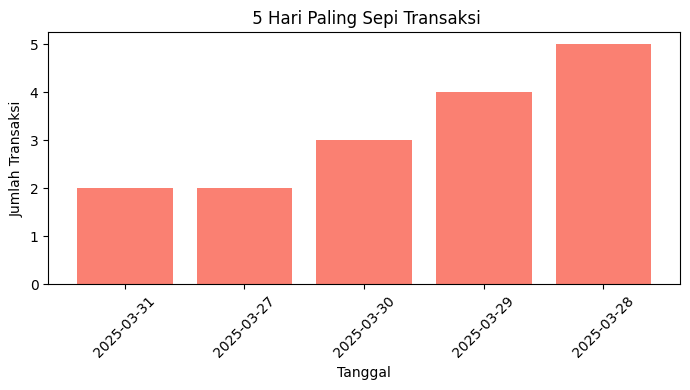

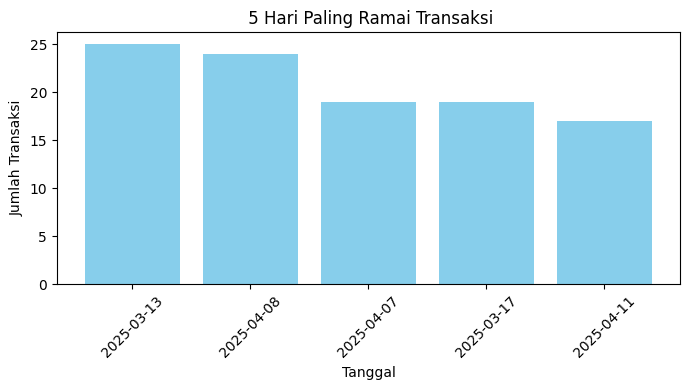

In [12]:
import matplotlib.pyplot as plt

# Ambil 5 hari paling sepi dan paling ramai
top5_sepi = rekap_harian.sort_values(by='JUMLAH_TRANSAKSI').head(5)
top5_ramai = rekap_harian.sort_values(by='JUMLAH_TRANSAKSI', ascending=False).head(5)

# Plot 5 hari paling sepi
plt.figure(figsize=(7,4))
plt.bar(top5_sepi['TANGGAL'].astype(str), top5_sepi['JUMLAH_TRANSAKSI'], color='salmon')
plt.title(' 5 Hari Paling Sepi Transaksi')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 5 hari paling ramai
plt.figure(figsize=(7,4))
plt.bar(top5_ramai['TANGGAL'].astype(str), top5_ramai['JUMLAH_TRANSAKSI'], color='skyblue')
plt.title(' 5 Hari Paling Ramai Transaksi')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Tampilkan daftar tanggal dari hasil split pohon
ramai_days = rekap_harian[rekap_harian['JUMLAH_TRANSAKSI'] > 11.5]['TANGGAL']
sepi_days = rekap_harian[rekap_harian['JUMLAH_TRANSAKSI'] <= 11.5]['TANGGAL']

print("📅 Tanggal Ramai (JUMLAH_TRANSAKSI > 11.5):")
for tgl in ramai_days:
    print("-", tgl)

print("\n📅 Tanggal Sepi (JUMLAH_TRANSAKSI <= 11.5):")
for tgl in sepi_days:
    print("-", tgl)

📅 Tanggal Ramai (JUMLAH_TRANSAKSI > 11.5):
- 2025-03-11
- 2025-03-12
- 2025-03-13
- 2025-03-14
- 2025-03-17
- 2025-03-18
- 2025-03-19
- 2025-04-04
- 2025-04-05
- 2025-04-07
- 2025-04-08
- 2025-04-09
- 2025-04-10
- 2025-04-11
- 2025-04-12
- 2025-04-14
- 2025-05-28

📅 Tanggal Sepi (JUMLAH_TRANSAKSI <= 11.5):
- 2025-03-15
- 2025-03-16
- 2025-03-20
- 2025-03-27
- 2025-03-28
- 2025-03-29
- 2025-03-30
- 2025-03-31
- 2025-04-02
- 2025-04-03
- 2025-04-06
- 2025-04-13
- 2025-05-29
- 2025-05-30
- 2025-05-31


# **Tahap 7 : Visualisasi**

### **7.1 Visualisasi Jumlah Transaksi Harian**

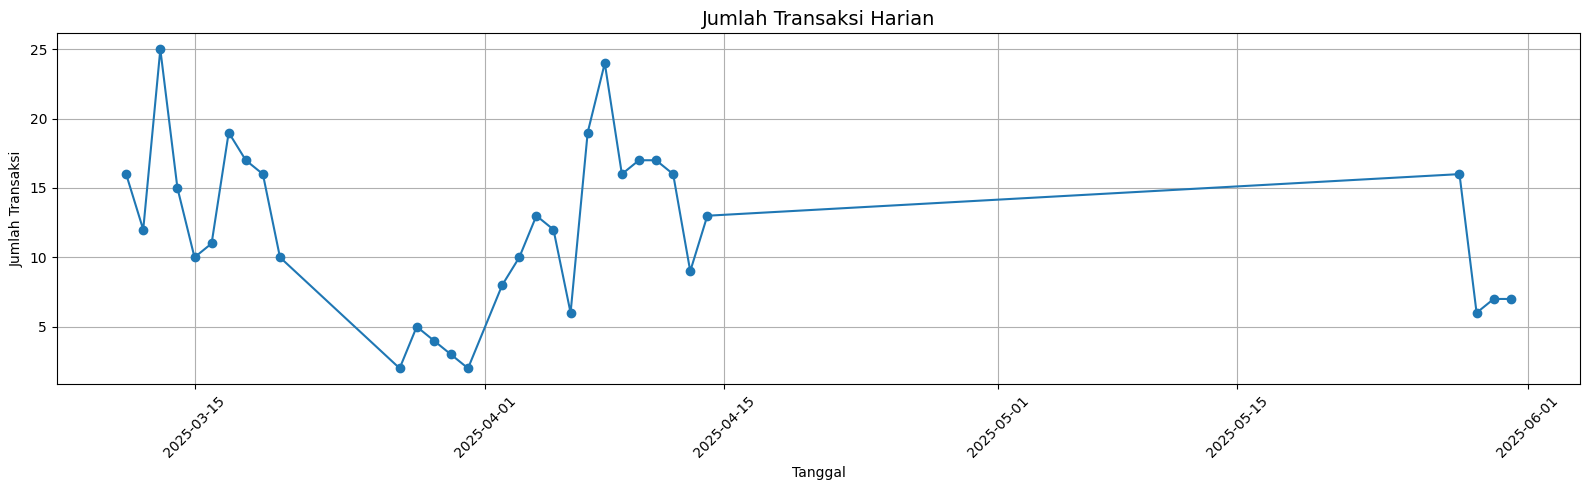

In [14]:
import matplotlib.pyplot as plt

# Visualisasi Jumlah Transaksi Harian
plt.figure(figsize=(16,5))
plt.plot(rekap_harian['TANGGAL'], rekap_harian['JUMLAH_TRANSAKSI'], marker='o')
plt.title('Jumlah Transaksi Harian', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **7.2 Visualisasi Kategori Aktual vs Prediksi**

C:\Users\resta\AppData\Local\Temp\ipykernel_15336\3948064781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='LABEL', palette='Blues', label='Aktual', alpha=0.6)
C:\Users\resta\AppData\Local\Temp\ipykernel_15336\3948064781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='PREDIKSI_LABEL', palette='Reds', label='Prediksi', alpha=0.4)


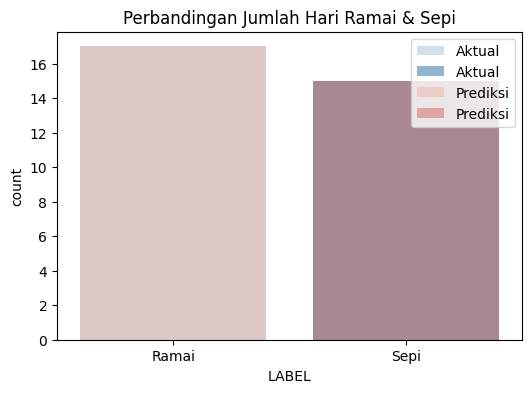

In [15]:
import seaborn as sns

# Buat dataframe salinan untuk plot
df_plot = rekap_harian.copy()

plt.figure(figsize=(6,4))
sns.countplot(data=df_plot, x='LABEL', palette='Blues', label='Aktual', alpha=0.6)
sns.countplot(data=df_plot, x='PREDIKSI_LABEL', palette='Reds', label='Prediksi', alpha=0.4)
plt.title('Perbandingan Jumlah Hari Ramai & Sepi')
plt.legend()
plt.show()

### **7.3 Visualisasi Decision Tree (Model)**

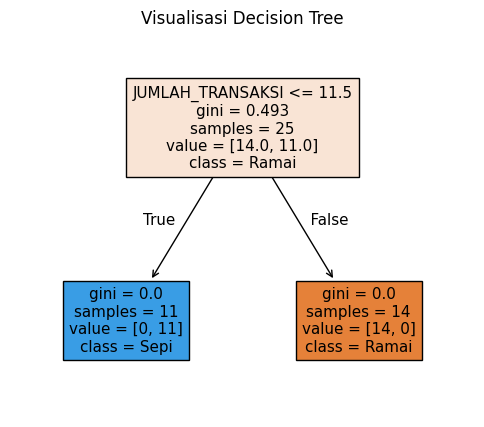

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(6,5))
plot_tree(model, feature_names=['JUMLAH_TRANSAKSI'], class_names=encoder.classes_, filled=True)
plt.title('Visualisasi Decision Tree')
plt.show()